In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv2D, Flatten, MaxPooling2D, Dropout

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix, roc_curve, classification_report

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
print(X_train_cnn.shape)

(60000, 28, 28, 1)


In [4]:
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
print(X_test_cnn.shape)

(10000, 28, 28, 1)


In [5]:
model = Sequential([
    Conv2D(32, (2, 2), activation="relu", input_shape = (28, 28, 1), name="convolucao_1"),
    MaxPooling2D((2, 2), name="pooling_1"),
    Flatten(name="flatten_1"),
    Dense(128, activation="relu", name="dense_1"),
    Dense(10, activation="softmax", name="dense_2")
])

# model.compile(optmizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# model.summary()

2022-10-11 12:27:27.270905: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer = tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 convolucao_1 (Conv2D)       (None, 27, 27, 32)        160       
                                                                 
 pooling_1 (MaxPooling2D)    (None, 13, 13, 32)        0         
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_1 (Dense)             (None, 128)               692352    
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,802
Trainable params: 693,802
Non-trainable params: 0
_________________________________________________________________


In [8]:
# model.fit(X_train_cnn, y_train, epochs=12)
# y_pred_cnn = np.argmax(model.predict(X_test_cnn), axis = -1)

# y_pred_cnn

In [9]:
# print(classification_report(y_pred_cnn, y_test))

In [10]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

In [11]:
test = "../Datasets/CATS_DOGS/test/"
train = "../Datasets/CATS_DOGS/train/"

In [12]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [13]:
training_set = train_datagen.flow_from_directory(train, target_size=(64, 64), batch_size=16, class_mode="categorical")
test_set = test_datagen.flow_from_directory(test, target_size=(64, 64), batch_size=16, class_mode="categorical")

Found 18743 images belonging to 2 classes.
Found 5830 images belonging to 2 classes.


In [14]:
training_set.class_indices

{'CAT': 0, 'DOG': 1}

In [15]:
test_set.class_indices

{'CAT': 0, 'DOG': 1}

In [16]:
model1 = Sequential()

model1.add(Conv2D(filters=32, kernel_size=3, input_shape=[64, 64, 3]))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Conv2D(filters=64, kernel_size=3))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Conv2D(128, kernel_size=3))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Conv2D(256, kernel_size=3))
model1.add(MaxPooling2D(pool_size=(2,2)))

model1.add(Dropout(.5))
model1.add(Flatten())
model1.add(Dense(units=128, activation="relu"))
model1.add(Dropout(.1))
model1.add(Dense(units=256, activation="relu"))
model1.add(Dropout(.25))
model1.add(Dense(units=2, activation="sigmoid"))

In [17]:
model1.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [18]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 128)       

In [19]:
try:
    history = model1.fit(
        training_set, 
        validation_data = test_set, 
        epochs=5, 
        steps_per_epoch=len(training_set), 
        validation_steps=len(test_set)
    )
except Exception as err:
    print(err)

Epoch 1/5
 306/1172 [======>.......................] - ETA: 41s - loss: 0.6975 - accuracy: 0.5312

/opt/anaconda3/envs/CustomEnvironments/lib/python3.8/site-packages/PIL/TiffImagePlugin.py:845: UserWarning: Truncated File Read
  warnings.warn(str(msg))


1172/1172 [==============================] - 63s 54ms/step - loss: 0.6562 - accuracy: 0.6045 - val_loss: 0.5399 - val_accuracy: 0.7274
Epoch 2/5
1172/1172 [==============================] - 60s 51ms/step - loss: 0.5584 - accuracy: 0.7222 - val_loss: 0.5424 - val_accuracy: 0.7353
Epoch 3/5
1172/1172 [==============================] - 59s 50ms/step - loss: 0.5032 - accuracy: 0.7614 - val_loss: 0.4631 - val_accuracy: 0.7803
Epoch 4/5
1172/1172 [==============================] - 58s 50ms/step - loss: 0.4697 - accuracy: 0.7869 - val_loss: 0.4143 - val_accuracy: 0.8082
Epoch 5/5
1172/1172 [==============================] - 58s 50ms/step - loss: 0.4424 - accuracy: 0.7982 - val_loss: 0.4328 - val_accuracy: 0.8058


In [20]:
def plot_lost_history(history):
    plt.plot(history.epoch, history.history["accuracy"], 'b', label='Accuracy')
    plt.plot(history.epoch, history.history["val_accuracy"], 'y', label='Validation Accuracy')
    plt.plot(history.epoch, history.history["loss"], 'g', label='Training loss')
    plt.plot(history.epoch, history.history["val_loss"], 'r', label='Validation loss')
    plt.title('Training loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss/Accuracy')
    plt.legend()
    plt.show()

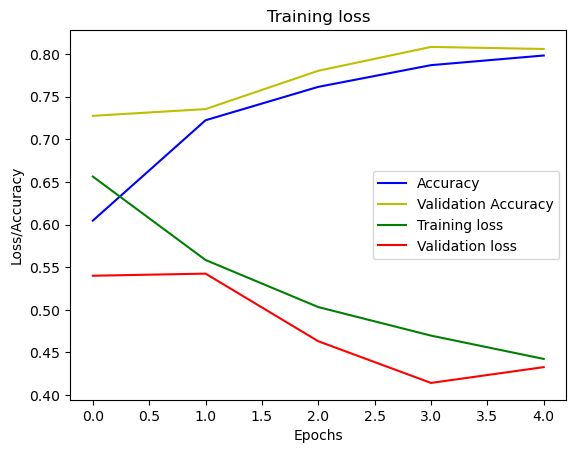

In [21]:
plot_lost_history(history)

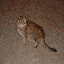

In [22]:
img = image.load_img("../Datasets/CATS_DOGS/test/CAT/10475.jpg", target_size=(64, 64))

img

In [24]:
X = image.img_to_array(img)
X = X/255
X = np.expand_dims(X, axis=0)
pred = np.argmax(model1.predict(X)[0], axis=-1)

1/1 [==============================] - 0s 78ms/step


In [26]:
model1.predict(X)

1/1 [==============================] - 0s 17ms/step


array([[0.80194455, 0.44402704]], dtype=float32)

In [ ]:
if pred == 1:
    print("DOG")
else:
    print("CAT")